In [229]:
#final assignment machine learning


In [156]:
# used for manipulating directory paths
import os

import utils

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces 

from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [12]:
# load data

In [13]:
red_wine = np.loadtxt(os.path.join('project', 'winequality-red.csv'),dtype=float,skiprows=1, delimiter=';')
white_wine = np.loadtxt(os.path.join('project', 'winequality-white.csv'),dtype=float,skiprows=1, delimiter=';')

In [14]:
#randomly split into train,cross and test sets  

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
np.random.seed(0)
red_wine_train,red_wine_test=train_test_split(red_wine,train_size=0.7,test_size=0.3,random_state=1)


white_wine_train,white_wine_test=train_test_split(white_wine,train_size=0.7,test_size=0.3,random_state=1)


In [17]:
print("red wine training set",len(red_wine_train))
print("red wine test set",len(red_wine_test))
print("white wine training set",len(white_wine_train))
print("white wine test set",len(white_wine_test))

red wine training set 1119
red wine test set 480
white wine training set 3428
white wine test set 1470


In [18]:
#split the data between input and output

In [19]:
red_wine_training, red_wine_training_score  =red_wine_train[:,0:11], red_wine_train[:,11]
white_wine_training, white_wine_training_score  = white_wine_train[:,0:11], white_wine_train[:,11]


red_wine_testing, red_wine_test_score  = red_wine_test[:,0:11], red_wine_test[:,11]
white_wine_testing, white_wine_test_score  = white_wine_test[:,0:11], white_wine_test[:,11]

In [20]:
numOfColumns = red_wine_training.shape[1]
print(numOfColumns)

11


In [21]:
print(red_wine_train)

[[ 8.2    1.33   0.    ...  0.49  10.9    5.   ]
 [ 7.3    0.49   0.1   ...  0.47  10.5    5.   ]
 [ 8.7    0.84   0.    ...  0.55   9.7    5.   ]
 ...
 [ 6.6    0.725  0.09  ...  0.49  10.8    6.   ]
 [ 7.2    0.63   0.    ...  0.58   9.     6.   ]
 [ 9.1    0.4    0.5   ...  0.69  12.5    8.   ]]


In [22]:
print(red_wine_training_score)

[5. 5. 5. ... 6. 6. 8.]


In [23]:
#normalize data between 0 and 1

In [24]:
red_wine_training_norm= red_wine_training / red_wine_training.max(axis=0)
white_wine_training_norm= white_wine_training / white_wine_training.max(axis=0)


red_wine_test_norm= red_wine_testing / red_wine_testing.max(axis=0)
white_wine_test_norm= white_wine_testing / white_wine_testing.max(axis=0)

In [25]:
print(red_wine_training_score)

[5. 5. 5. ... 6. 6. 8.]


In [26]:
numOfColumns = red_wine_training_norm.shape[1]
print(numOfColumns)

11


In [27]:
mred = red_wine_training_score.size
m2 = white_wine_training_score.size
m1 = red_wine_test_score.size
mwhite = white_wine_test_score.size

red_wine_training_norm = np.concatenate([np.ones((mred, 1)), red_wine_training_norm], axis=1)
red_wine_test_norm = np.concatenate([np.ones((m1, 1)), red_wine_test_norm], axis=1)
white_wine_test_norm = np.concatenate([np.ones((mwhite, 1)), white_wine_test_norm], axis=1)
white_wine_training_norm = np.concatenate([np.ones((m2, 1)), white_wine_training_norm], axis=1)

In [28]:
print(red_wine_training_norm)

[[1.         0.51572327 0.84177215 ... 0.88029925 0.245      0.73154362]
 [1.         0.4591195  0.31012658 ... 0.82294264 0.235      0.70469799]
 [1.         0.54716981 0.53164557 ... 0.81546135 0.275      0.65100671]
 ...
 [1.         0.41509434 0.45886076 ... 0.83541147 0.245      0.72483221]
 [1.         0.45283019 0.39873418 ... 0.840399   0.29       0.60402685]
 [1.         0.57232704 0.25316456 ... 0.80049875 0.345      0.83892617]]


In [29]:
def computeCost(X, y, theta):
  
    J = 0
    m = y.size
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    
    return J

In [30]:
theta = np.zeros(12)


J = computeCost(red_wine_training_norm, red_wine_training_score, theta)

In [31]:
print(J)

16.329311885612153


In [32]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

theta computed from gradient descent: [ 1.97489678  0.43485776 -1.92598226 -0.28640658  0.02018123 -1.03496536
  0.43869943 -1.01628767  1.79636194 -1.27998912  1.68345001  4.4382431 ]
0 score voorspelt = 5.513074844069097
0 echte score = 5.0
1 score voorspelt = 5.185333987120935
1 echte score = 6.0
2 score voorspelt = 6.041914422316858
2 echte score = 6.0
3 score voorspelt = 5.649616765524096
3 echte score = 6.0
4 score voorspelt = 6.67806440786425
4 echte score = 6.0
5 score voorspelt = 6.036152245463142
5 echte score = 6.0
6 score voorspelt = 6.1895206236939995
6 echte score = 6.0
7 score voorspelt = 4.847114218175286
7 echte score = 5.0
8 score voorspelt = 5.519894946334933
8 echte score = 5.0
9 score voorspelt = 4.9255820628054705
9 echte score = 5.0
10 score voorspelt = 6.128324583814151
10 echte score = 6.0
11 score voorspelt = 5.210647274601126
11 echte score = 6.0
12 score voorspelt = 5.522408766934982
12 echte score = 6.0
13 score voorspelt = 6.494536413887149
13 echte score 

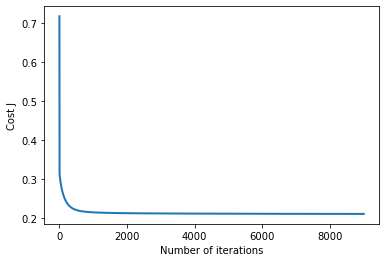

In [33]:
# Choose some alpha value 
alpha = 0.3
num_iters = 9000
theta = np.zeros(12)
# init theta and run gradient descent

theta, J_history = gradientDescent(red_wine_training_norm, red_wine_training_score, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))


for i in range (100):
    X_array = red_wine_test_norm[i,:]

    quality = np.dot(X_array, theta)  # dit is de voorspelling
    # ===================================================================

    print(i,"score voorspelt =",quality)
    print(i,"echte score =",red_wine_test_score[i])
    
q= np.dot(red_wine_test_norm, theta) - red_wine_test_score 
s = np.size(q)
t=np.absolute(q)
r = (sum(t)/s)
print('de absolute nauwkeurigheid van de rode wijn is', r)
p = np.round(np.dot(red_wine_test_norm, theta))
print('de nauwkeurigheid na classificeren van de output is: {:.2f} %'.format(np.mean(p == red_wine_test_score) * 100))


In [34]:
#because of the large amount of 6/10 quality score the linear regression has a very high bias towards 6, 

theta computed from gradient descent: [ 1.15451107 -0.6408036  -2.30132813 -0.06123997  1.84233361 -0.42027377
  1.09874211 -0.19964052  0.93507513  0.60277709  0.40214646  5.2902776 ]
0 score voorspelt = 5.55548047417431
0 echte score = 4.0
1 score voorspelt = 5.980690059770115
1 echte score = 6.0
2 score voorspelt = 6.454239173847135
2 echte score = 7.0
3 score voorspelt = 5.84185089566267
3 echte score = 5.0
4 score voorspelt = 6.810905345910173
4 echte score = 7.0
5 score voorspelt = 5.564755406767759
5 echte score = 6.0
6 score voorspelt = 5.288825951473841
6 echte score = 6.0
7 score voorspelt = 5.112959795916838
7 echte score = 6.0
8 score voorspelt = 6.192155729654458
8 echte score = 7.0
9 score voorspelt = 6.2476365050289715
9 echte score = 5.0
10 score voorspelt = 6.6969410811852805
10 echte score = 6.0
11 score voorspelt = 6.184148035781398
11 echte score = 7.0
12 score voorspelt = 6.6969632360327624
12 echte score = 6.0
13 score voorspelt = 6.422783403664231
13 echte score 

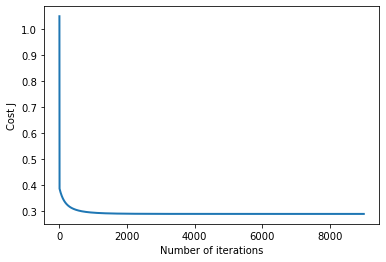

In [35]:
# Choose some alpha value 
alpha = 0.3
num_iters = 9000
theta = np.zeros(12)
# init theta and run gradient descent

theta, J_history = gradientDescent(white_wine_training_norm, white_wine_training_score, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))


for i in range (100):
    X_array = white_wine_test_norm[i,:]

    quality = np.dot(X_array, theta)  # dit is de voorspelling
    # ===================================================================

    print(i,"score voorspelt =",quality)
    print(i,"echte score =",white_wine_test_score[i])
    
q= np.dot(white_wine_test_norm, theta) - white_wine_test_score 
s = np.size(q)
t=np.absolute(q)
r = (sum(t)/s)
print('de absolute nauwkeurigheid van de witte wijn is',r)
p = np.round(np.dot(white_wine_test_norm, theta))
print('de nauwkeurigheid na classificeren van de output is: {:.2f} %'.format(np.mean(p == white_wine_test_score) * 100))


In [36]:
#testen invloed van de kolommen met een laag gewicht(theta)

theta computed from gradient descent: [ 1.42741111  0.37816081 -1.93224757 -0.21570674 -0.06750749  1.24559978
 -0.3107092   1.18240876  4.79567845]
0 score voorspelt = 5.833601006548599
0 echte score = 5.0
1 score voorspelt = 5.335706410433872
1 echte score = 6.0
2 score voorspelt = 6.30110437798717
2 echte score = 6.0
3 score voorspelt = 5.655036191743422
3 echte score = 6.0
4 score voorspelt = 6.7161266193579365
4 echte score = 6.0
5 score voorspelt = 6.035457210393913
5 echte score = 6.0
6 score voorspelt = 6.29867182469535
6 echte score = 6.0
7 score voorspelt = 5.318613030102247
7 echte score = 5.0
8 score voorspelt = 5.513579739215537
8 echte score = 5.0
9 score voorspelt = 4.979991703038272
9 echte score = 5.0
10 score voorspelt = 5.962435883437626
10 echte score = 6.0
11 score voorspelt = 5.26971196136063
11 echte score = 6.0
12 score voorspelt = 5.650920743094554
12 echte score = 6.0
13 score voorspelt = 6.406119631757003
13 echte score = 6.0
14 score voorspelt = 5.5607492957

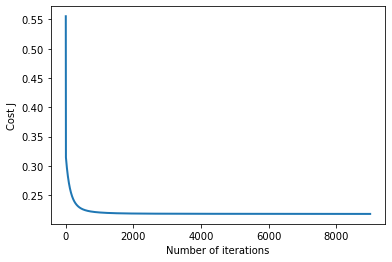

In [37]:
# Choose some alpha value 
alpha = 0.3
num_iters = 9000
theta = np.zeros(9)
# init theta and run gradient descent
red_wine_training_norm_optimum = np.delete(np.delete(np.delete(red_wine_training_norm,3,1),4,1) ,5,1)


red_wine_test_norm_optimum = np.delete(np.delete(np.delete(red_wine_test_norm,3,1),4,1) ,5,1)

theta, J_history = gradientDescent(red_wine_training_norm_optimum, red_wine_training_score, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))


for i in range (100):
    X_array = red_wine_test_norm_optimum[i,:]

    quality = np.dot(X_array, theta)  # dit is de voorspelling
    # ===================================================================

    print(i,"score voorspelt =",quality)
    print(i,"echte score =",red_wine_test_score[i])
    
q= np.dot(red_wine_test_norm_optimum, theta) - red_wine_test_score
s = np.size(q)
t=np.absolute(q)
r = (sum(t)/s)
print('de absolute nauwkeurigheid van de rode wijn is', r)
p = np.round(np.dot(red_wine_test_norm_optimum, theta))
print('de nauwkeurigheid na classificeren van de output is: {:.2f} %'.format(np.mean(p == red_wine_test_score) * 100))

theta computed from gradient descent: [ 1.05115874 -0.66939254 -2.34876979  1.84739563  0.90108541  0.82098214
  0.61080148  0.37917162  5.471177  ]
0 score voorspelt = 5.816484843250643
0 echte score = 4.0
1 score voorspelt = 5.353234818699786
1 echte score = 6.0
2 score voorspelt = 6.296411736337668
2 echte score = 7.0
3 score voorspelt = 5.9270109536533715
3 echte score = 5.0
4 score voorspelt = 7.010792241465869
4 echte score = 7.0
5 score voorspelt = 6.184621502571602
5 echte score = 6.0
6 score voorspelt = 6.489787427734728
6 echte score = 6.0
7 score voorspelt = 5.084058060958514
7 echte score = 6.0
8 score voorspelt = 6.345142721717991
8 echte score = 7.0
9 score voorspelt = 4.843302076722108
9 echte score = 5.0
10 score voorspelt = 6.365326873540937
10 echte score = 6.0
11 score voorspelt = 5.209799200406939
11 echte score = 7.0
12 score voorspelt = 6.014767331515195
12 echte score = 6.0
13 score voorspelt = 6.690390831368649
13 echte score = 6.0
14 score voorspelt = 5.4982551

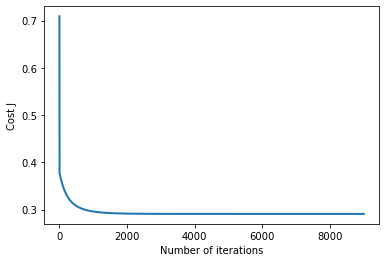

In [38]:
# Choose some alpha value 
alpha = 0.3
num_iters = 9000
theta = np.zeros(9)
# init theta and run gradient descent
white_wine_training_norm_optimum = np.delete(np.delete(np.delete(white_wine_training_norm,3,1),4,1) ,5,1)


white_wine_test_norm_optimum = np.delete(np.delete(np.delete(white_wine_test_norm,3,1),4,1) ,5,1)

theta, J_history = gradientDescent(white_wine_training_norm_optimum, white_wine_training_score, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))


for i in range (100):
    X_array = red_wine_test_norm_optimum[i,:]

    quality = np.dot(X_array, theta)  # dit is de voorspelling
    # ===================================================================

    print(i,"score voorspelt =",quality)
    print(i,"echte score =",white_wine_test_score[i])
    
q= np.dot(white_wine_test_norm_optimum, theta) - white_wine_test_score
s = np.size(q)
t=np.absolute(q)
r = (sum(t)/s)
print('de absolute nauwkeurigheid van de witte wijn is', r)
p = np.round(np.dot(white_wine_test_norm_optimum, theta))
print('de nauwkeurigheid na classificeren van de output is: {:.2f} %'.format(np.mean(p == white_wine_test_score) * 100))

In [39]:
#na het droppen van de kolommen met en laag gewicht is de nauwkeurigheid amper beinvloed

In [40]:
#SVM

In [41]:
#randomizen en splitsen in train cross en test dataset

In [42]:
np.random.seed(0)
red_svm_train,red_svm=train_test_split(red_wine,train_size=0.6,test_size=0.4,random_state=1)
red_svm_cross,red_svm_test=train_test_split(red_svm,train_size=0.5,test_size=0.5,random_state=1)

white_svm_train,white_svm=train_test_split(white_wine,train_size=0.6,test_size=0.4,random_state=1)
white_svm_cross,white_svm_test=train_test_split(white_svm,train_size=0.5,test_size=0.5,random_state=1)

In [43]:
red_svm_training, red_svm_training_score  =red_svm_train[:,0:11], red_svm_train[:,11]
white_svm_training, white_svm_training_score  = white_svm_train[:,0:11], white_svm_train[:,11]

red_svm_cross, red_svm_cross_score  =red_svm_train[:,0:11], red_svm_train[:,11]
white_svm_cross, white_svm_cross_score  = white_svm_train[:,0:11], white_svm_train[:,11]

red_svm_testing, red_svm_test_score  = red_svm_test[:,0:11], red_svm_test[:,11]
white_svm_testing, white_svm_test_score  = white_svm_test[:,0:11], white_svm_test[:,11]

In [44]:
#normaliseren van de data

In [45]:
red_svm_training_norm= red_svm_training / red_svm_training.max(axis=0)
white_svm_training_norm= white_svm_training / white_svm_training.max(axis=0)


red_svm_test_norm= red_svm_testing / red_svm_testing.max(axis=0)
white_svm_test_norm= white_svm_testing / white_svm_testing.max(axis=0)

white_svm_cross_norm= white_svm_cross / white_svm_cross.max(axis=0)
red_svm_cross_norm= red_svm_cross / red_svm_cross.max(axis=0)

In [46]:
#data splitsen in alle klasses om een one vs all aanpak te doen.

In [47]:
def splitinclasses(y):
    split = np.zeros((y.size,11))
    
    for j in range(11):
        for k in range(y.size):
            if(y[k]==j):
                split[k,j]=1
            else:
                split[k,j]=0
    return split
                
    

In [48]:
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    
    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.
    
    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    sim : float
        The computed RBF between the two provided data points.
    
    Instructions
    ------------
    Fill in this function to return the similarity between `x1` and `x2`
    computed using a Gaussian kernel with bandwidth `sigma`.
    """
    sim = 0
    # ====================== YOUR CODE HERE ======================

    sim = np.exp(-np.sum((x1 - x2) ** 2)/(2 * (sigma ** 2)))

    # =============================================================
    return sim

In [196]:
def idealsigmaC(X, y, Xval, yval):
    """
    Returns your choice of C and sigma for Part 3 of the exercise 
    where you select the optimal (C, sigma) learning parameters to use for SVM
    with RBF kernel.
    
    Parameters
    ----------
    X : array_like
        (m x n) matrix of training data where m is number of training examples, and 
        n is the number of features.
    
    y : array_like
        (m, ) vector of labels for ther training data.
    
    Xval : array_like
        (mv x n) matrix of validation data where mv is the number of validation examples
        and n is the number of features
    
    yval : array_like
        (mv, ) vector of labels for the validation data.
    
    Returns
    -------
    C, sigma : float, float
        The best performing values for the regularization parameter C and 
        RBF parameter sigma.
    
    Instructions
    ------------
    Fill in this function to return the optimal C and sigma learning 
    parameters found using the cross validation set.
    You can use `svmPredict` to predict the labels on the cross
    validation set. For example, 
    
        predictions = utils.svmPredict(model, Xval)

    will return the predictions on the cross validation set.
    
    Note
    ----
    You can compute the prediction error using 
    
        np.mean(predictions != yval)
    """
    
    C = 0
    sigma = 0
    
    # ====================== YOUR CODE HERE ======================

    C_array = np.array([0.000001,0.00001,0.0001,0.001, 1])
    sigma_array = np.array([0.000000001,0.00000001,0.0000001,0.000001])
    
    err_array = np.zeros([C_array.size, sigma_array.size])
    
    for i in np.arange(C_array.size):
        for j in np.arange(sigma_array.size):
            model= utils.svmTrain(X, y, C_array[i], gaussianKernel, args=(sigma_array[j],))
            predictions = utils.svmPredict(model, Xval)
            pred_error = np.mean(predictions != yval)
            
            err_array[i, j] = pred_error
        
    ind = np.unravel_index(np.argmin(err_array, axis = None), err_array.shape) #np.unravel returned absolute index, bji 2x2 geeft die 3 terug ipv (2,1)
    C = C_array[ind[0]]
    sigma = sigma_array[ind[1]]
    
    # ============================================================
    return C, sigma

In [197]:
def trainsvms(X,y,Xcross,ycross):
    
    split = splitinclasses(y)
    splitcross = splitinclasses(ycross)
    C=np.zeros(11)
    sigma=np.zeros(11)
    model = {}
    for i in range(11):
        c1, s1=idealsigmaC(X,split[:,i],Xcross,splitcross[:,i])
        C[i]=c1
        sigma[i]=s1
        model[i]=  utils.svmTrain(X,split[:,i], C[i], gaussianKernel, args=(sigma[i],))
    
    return sigma, C , model

In [281]:
def trainkort(X,y,sigma,C):
    split = splitinclasses(y)
    model = {}
    for i in range(11):
        model[i]=  utils.svmTrain(X,split[:,i], C[i], gaussianKernel, args=(sigma[i],))
    
    return sigma, C , model

In [198]:
sigma, C , model =trainsvms(red_svm_training_norm,red_svm_training_score,red_svm_cross_norm,red_svm_cross_score)
print(C)
print(sigma)

[1.e-06 1.e-06 1.e-06 1.e+00 1.e-03 1.e+00 1.e+00 1.e+00 1.e-03 1.e-06
 1.e-06]
[1.e-09 1.e-09 1.e-09 1.e-06 1.e-07 1.e-07 1.e-07 1.e-07 1.e-07 1.e-09
 1.e-09]


In [295]:
C = [0, 0, 0, 1.,   0.001,    1, 1.,   1, 0.001,    0, 0]
sigma = [0.00000001, 0.00000001, 0.00000001,0.00001,0.000001,0.000001,0.000001,0.000001,0.00001,0.00000001,0.000000001]

In [296]:
#voor niet zware berekening terug opnieuw te doen

In [297]:
sigma, C , model =trainkort(red_svm_training_norm,red_svm_training_score,sigma,C)
print(C)
print(sigma)

[0, 0, 0, 1.0, 0.001, 1, 1.0, 1, 0.001, 0, 0]
[1e-08, 1e-08, 1e-08, 1e-05, 1e-06, 1e-06, 1e-06, 1e-06, 1e-05, 1e-08, 1e-09]


In [298]:
split = splitinclasses(red_svm_test_score)


In [299]:
np.set_printoptions(threshold=np.inf)

In [305]:
x=utils.svmPredict(model[5],red_svm_test_norm)
pred_error = np.mean(x != split[:,5])

In [306]:
print(x)
print(pred_error)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
0.453125


In [302]:
print(red_svm_test_score)
print(red_svm_test_norm)
print(red_svm_cross_score)
print(red_svm_cross_norm)

[7. 5. 6. 5. 5. 4. 5. 5. 6. 6. 7. 5. 6. 6. 6. 6. 7. 5. 6. 5. 6. 5. 5. 6.
 5. 5. 5. 6. 5. 5. 5. 7. 6. 6. 5. 5. 5. 7. 5. 5. 6. 6. 6. 4. 4. 5. 5. 5.
 5. 6. 5. 6. 6. 5. 6. 5. 7. 5. 6. 6. 6. 5. 7. 6. 6. 5. 6. 5. 5. 6. 6. 8.
 6. 5. 5. 5. 6. 6. 8. 5. 6. 6. 5. 4. 7. 7. 7. 7. 6. 6. 4. 6. 7. 6. 5. 5.
 6. 5. 7. 5. 6. 4. 7. 5. 5. 6. 5. 5. 5. 5. 5. 6. 5. 5. 5. 6. 6. 5. 5. 5.
 5. 5. 8. 5. 6. 5. 7. 6. 7. 5. 7. 6. 5. 7. 5. 5. 5. 5. 5. 5. 6. 6. 5. 8.
 5. 5. 6. 6. 5. 6. 5. 5. 6. 5. 6. 5. 6. 6. 5. 6. 7. 6. 5. 5. 5. 6. 5. 5.
 5. 5. 7. 7. 6. 6. 5. 5. 5. 7. 7. 6. 6. 5. 5. 4. 5. 6. 6. 6. 6. 6. 5. 7.
 5. 6. 5. 5. 5. 6. 7. 7. 5. 5. 5. 6. 7. 6. 5. 5. 5. 6. 6. 6. 5. 5. 6. 5.
 5. 5. 5. 4. 5. 6. 5. 7. 6. 5. 6. 5. 7. 6. 6. 5. 6. 5. 5. 6. 6. 6. 5. 6.
 6. 5. 6. 5. 7. 5. 7. 5. 7. 6. 4. 5. 6. 5. 6. 5. 5. 7. 5. 7. 6. 7. 6. 6.
 6. 7. 6. 5. 5. 6. 7. 5. 7. 7. 5. 7. 5. 6. 7. 5. 5. 5. 5. 5. 7. 3. 5. 5.
 5. 6. 6. 6. 6. 5. 6. 6. 6. 7. 5. 5. 5. 5. 4. 7. 6. 6. 6. 6. 5. 5. 7. 6.
 6. 5. 6. 4. 6. 5. 7. 6.]
[[0.60666667 0.27067669 0